# Wrangle and Analyze Data - WeRateDogs

Table of Contents
1. Introduction
2. Gathering Data
3. Assessing Data
4. Cleaning Data
5. Analyzing Data & Visualization

#### 1. Introduction
This project is aimed to practice the skills of data wrangling using real-world data. Data wrangling process consists three parts: gather, assess and clean. The dataset for this project is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 
1. First, gather data in different format from different sources. 
2. Then assess the data both visually and programmatically to identify any data quality issues and tidiness issues. 
3. After that, do programmatical cleaning to fix all the issues. 
3. Then analyze the cleaned dataset and visualize the results.

 #### 2. Gathering Data

Gather each of the three pieces of data from different sources:

1. WeRateDogs Twitter archive: provided to the project twitter_archive_enhanced.csv
2. Tweet image predictions:image_predictions.tsv downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
3. Twitter API for retweet count and favorite count: tweet_json.txt downloaded programmatically using the Requests library and the following URL: https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt

To get started, let's import our libraries.

In [140]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. WeRateDogs Twitter Archive

In [141]:
# Read CSV file
twitter_archive = pd.read_csv('./twitter-archive-enhanced.csv')

In [142]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Tweet Image Predictions

In [143]:
# Download file using Requests library via URL provided 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [144]:
# Save the file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Twitter API

In [145]:
# Download file using Requests library via URL provided 
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)
response

<Response [200]>

In [146]:
# Save the file
with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [147]:
# Read downloaded txt file line by line into a pandas DataFrame
df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### 3. Assessing Data
Assess the data both visually and programmatically to identify any data quality(content) issues and tidiness(structual) issues.

Data quality dimensions:

- Completeness
- Validity
- Accuracy
- Consistency

Tidy data requirements:

- Each variable forms a column
- Each observation forms a row
- Each type of observational unit forms a table

In [148]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [149]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [150]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [151]:
twitter_archive.duplicated().sum()

0

In [152]:
twitter_archive['tweet_id'].duplicated().sum()

0

In [153]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [154]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [155]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [156]:
twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

It is unlikely that "None" is the name for so many dogs, so these will have to be replaced with NaN.

I also want to look up any values in the name column that do not start with a capital letter. This is a clear indication that it is not actually a name.

In [157]:
# use regex to find all lowercase names
twitter_archive[twitter_archive['name'].str.contains(r'^[^A-Z].*$')]['name'].value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

For all of the stages, it looks like there are variations on the stage names that were not extracted.

#### Observations:

- source info redundent, not easy to read
- abnormal values in rating_denominator, e.g., 170, 150, 130, etc. The rating_denominator is almost always 10
- abnormal values in rating_numerator, e.g., 1776, 960, 666, 204, 165,etc. make no sense.
- doggo, floofer, pupper, puppo are all stages of dog, should be in one column
- timestamp is str, should be datetime, remove +0000 in timestamp
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are float, should all be int
- we only need original ratings with pictures, retweets and replies entries should be removed- loads of null values
- Many dogs names are "None" or lowercase words, which are incorrect
- For all of the stages, it looks like there are variations on the stage names that were not extracted.

#### image_prediction table

In [158]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [159]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [160]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [161]:
image_prediction['tweet_id'].duplicated().sum()

0

In [162]:
image_prediction['jpg_url'].duplicated().sum()

66

In [163]:
image_prediction['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [164]:
image_prediction['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [165]:
image_prediction['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [166]:
image_prediction.query('p1_conf+p2_conf+p3_conf > 1')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [167]:
image_prediction.query('p1_dog == False & p2_dog == False & p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


#### Obervatoins:

- inconsistent capitalization in p1, p2 and p3 columns
- jpg url duplicates
- many entries are not dogs
- we only need the most confident prediction for dog breed for this analysis
- 1 row where the total confidence is greater than 1

#### tweet_json table

In [168]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [169]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [170]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [171]:
tweet_json.duplicated().sum()

0

In [172]:
tweet_json.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

#### Obervatoins:
- missing data probably due to retweets in twitter_archive

#### Observation Summary:

#### Quality

>twitter_archive table
- source info redundent, not easy to read
- abnormal values in rating_denominator, e.g., 170, 150, 130, etc. The rating_denominator is almost always 10
- abnormal values in rating_numerator, e.g., 1776, 960, 666, 204, 165,etc. make no sense.
- timestamp is str, should be datetime, remove +0000 in timestamp
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are float, should all be int
- we only need original ratings with pictures, retweets and replies entries should be removed- loads of null values
- Many dogs names are "None" or lowercase words, which are incorrect
- For all of the stages, it looks like there are variations on the stage names that were not extracted.
>image_prediction table
- inconsistent capitalization in p1, p2 and p3 columns
- jpg url duplicates
- many entries are not dogs
- we only need the most confident prediction for dog breed for this analysis
- 1 row where the total confidence is greater than 1

>tweet_json table
- missing data probably due to retweets in twitter_archive

#### Tidiness
- twitter_archive: doggo, floofer, pupper, puppo are all stages of dog, should be in one column
- The three tables should be combined into one since they're all related to the same type of observational unit

#### 4.Cleaning Data
The programmatic data cleaning process:

Define: convert our assessments into defined cleaning tasks.
Code: convert those definitions to code and run that code.
Test: test the dataset, visually or with code, to make sure the cleaning operations worked.

In [173]:
# Make copys for all the data
df1= twitter_archive.copy()
df2 = image_prediction.copy()
df3= tweet_json.copy()

#### 1. Define: Remove retweets by dropping rows in df1 that have values in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp, and then drop those three columns.

In [174]:
# remove retweets
df1[df1['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [175]:
df1= df1[df1['retweeted_status_id'].isnull()]

In [176]:
# drop columns related to retweets that should be null now
df1.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1,inplace=True)

#### Test

In [177]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

#### 2. Define: Query for rows in predictions_clean with tweet_id that are also in archive_clean to remove retweets. This should also remove the duplicated values in the jpg_url column.

In [178]:
df4 = df1['tweet_id']

In [179]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [180]:
df2 = df2.query('tweet_id in @df4')

#### Test

In [181]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1994 non-null   int64  
 1   jpg_url   1994 non-null   object 
 2   img_num   1994 non-null   int64  
 3   p1        1994 non-null   object 
 4   p1_conf   1994 non-null   float64
 5   p1_dog    1994 non-null   bool   
 6   p2        1994 non-null   object 
 7   p2_conf   1994 non-null   float64
 8   p2_dog    1994 non-null   bool   
 9   p3        1994 non-null   object 
 10  p3_conf   1994 non-null   float64
 11  p3_dog    1994 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 161.6+ KB


In [182]:
sum(df2['jpg_url'].duplicated())

0

#### 3. Define: Remove records in predictions_clean that are probably not pictures of dogs by querying for rows that have at least one True value between p1_dog, p2_dog, and p3_dog. This should also drop the row with confidence greater than 1.

In [183]:
df2 = df2.query('p1_dog == True | p2_dog == True | p3_dog == True')

#### Test

In [184]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1686 non-null   int64  
 1   jpg_url   1686 non-null   object 
 2   img_num   1686 non-null   int64  
 3   p1        1686 non-null   object 
 4   p1_conf   1686 non-null   float64
 5   p1_dog    1686 non-null   bool   
 6   p2        1686 non-null   object 
 7   p2_conf   1686 non-null   float64
 8   p2_dog    1686 non-null   bool   
 9   p3        1686 non-null   object 
 10  p3_conf   1686 non-null   float64
 11  p3_dog    1686 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 136.7+ KB


In [185]:
df2.query('p1_conf+p2_conf+p3_conf > 1')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### 4. Define: Only keep rows in archive_clean that have tweet_id also in predictions_clean to remove records that are not images of dogs.

In [186]:
df5 = df2['tweet_id']

In [187]:
df1= df1.query('tweet_id in @df5')

#### Test

In [188]:
# check that archive_clean and predictions_clean now have the same number of tweets
assert len(df1)==len(df2)

#### 4. Define: Left join df3 to df1 on tweet_id to put all tweet data in the same dataframe. Because df1 does not have any retweets, this should also remove any favorite_count with value 0.

In [189]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None


In [190]:
df1= df1.merge(df3, how='left', on='tweet_id')

#### Test

In [191]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1686 non-null   int64  
 1   in_reply_to_status_id  20 non-null     float64
 2   in_reply_to_user_id    20 non-null     float64
 3   timestamp              1686 non-null   object 
 4   source                 1686 non-null   object 
 5   text                   1686 non-null   object 
 6   expanded_urls          1686 non-null   object 
 7   rating_numerator       1686 non-null   int64  
 8   rating_denominator     1686 non-null   int64  
 9   name                   1686 non-null   object 
 10  doggo                  1686 non-null   object 
 11  floofer                1686 non-null   object 
 12  pupper                 1686 non-null   object 
 13  puppo                  1686 non-null   object 
 14  retweet_count          1686 non-null   int64  
 15  favo

In [192]:
assert len(df1)==len(df2)

In [193]:
df1.query('favorite_count == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count


#### 5. Define: Use melt() function to make df2 tidy. Because the prediction, confidence, and dog status are all separate variables, I will perform this three times to produce three different dataframes, and then merge them all together on the common columns. Before melting, I will also change the column names to 1, 2, and 3, since those are the valid values for the prediction number.

In [194]:
df2_old= df2.copy()

In [195]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [196]:
df2[df2['tweet_id']== 666020888022790149]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [197]:
def melt(p1, p2, p3, value_name):
    '''
    INPUT:
    p1 (str) - column related to the first prediction
    p2 (str) - column related to the second prediction
    p3 (str) - column related to the third prediction
    value_name (str) - name of the column that holds the values from the predictions
    
    OUTPUT:
    df (DataFrame) - dataframe with unpivoted prediction data
    
    Unpivot dataframe for prediction columns.
    '''
    
    df = df2[['tweet_id', 'jpg_url', 'img_num', p1, p2, p3]]
    # change column names so that they do not have to be extracted later
    df.rename(columns={p1: 1, p2: 2, p3: 3}, inplace=True)
    df = pd.melt(
        df,
        id_vars=['tweet_id', 'jpg_url', 'img_num'],
        value_vars=[1, 2, 3],
        var_name='prediction_num',
        value_name=value_name
    )
    return df

In [198]:
predictions_names = melt('p1', 'p2', 'p3', 'prediction')
predictions_names[predictions_names['tweet_id']== 666020888022790149]

C:\Users\SumeetAbhu\AppData\Local\Temp\ipykernel_14308\2437458811.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={p1: 1, p2: 2, p3: 3}, inplace=True)


,tweet_id,jpg_url,img_num,prediction_num,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel
1686,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie
3372,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog


In [199]:
predictions_names

,tweet_id,jpg_url,img_num,prediction_num,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature_pinscher
...,...,...,...,...,...
5053,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,3,Indian_elephant
5054,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,3,German_short-haired_pointer
5055,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,3,spatula
5056,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,3,kelpie


In [200]:
predictions_dog = melt('p1_dog', 'p2_dog', 'p3_dog', 'dog_status')
predictions_dog

C:\Users\SumeetAbhu\AppData\Local\Temp\ipykernel_14308\2437458811.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={p1: 1, p2: 2, p3: 3}, inplace=True)


,tweet_id,jpg_url,img_num,prediction_num,dog_status
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,True
...,...,...,...,...,...
5053,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,3,False
5054,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,3,True
5055,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,3,False
5056,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,3,True


In [201]:
predictions_dog[predictions_dog['tweet_id']== 666020888022790149]

,tweet_id,jpg_url,img_num,prediction_num,dog_status
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,True
1686,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,True
3372,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,True


In [202]:
predictions_conf = melt('p1_conf', 'p2_conf', 'p3_conf', 'confidence')
predictions_conf

C:\Users\SumeetAbhu\AppData\Local\Temp\ipykernel_14308\2437458811.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={p1: 1, p2: 2, p3: 3}, inplace=True)


,tweet_id,jpg_url,img_num,prediction_num,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,0.560311
...,...,...,...,...,...
5053,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,3,0.076902
5054,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,3,0.175219
5055,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,3,0.040836
5056,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,3,0.031379


In [203]:
predictions_conf[predictions_conf['tweet_id']== 666020888022790149]

,tweet_id,jpg_url,img_num,prediction_num,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,0.465074
1686,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,0.156665
3372,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,0.061428


In [204]:
# merge together the three melted dataframes
df2 = predictions_names.merge(predictions_conf,how='inner', on=['tweet_id', 'jpg_url', 'img_num', 'prediction_num'])

In [205]:
df2 = df2.merge(predictions_dog,how='inner',on=['tweet_id', 'jpg_url', 'img_num', 'prediction_num'])

#### Test

In [206]:
df2.head()

,tweet_id,jpg_url,img_num,prediction_num,prediction,confidence,dog_status
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature_pinscher,0.560311,True


In [207]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5058 entries, 0 to 5057
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        5058 non-null   int64  
 1   jpg_url         5058 non-null   object 
 2   img_num         5058 non-null   int64  
 3   prediction_num  5058 non-null   object 
 4   prediction      5058 non-null   object 
 5   confidence      5058 non-null   float64
 6   dog_status      5058 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 281.5+ KB


In [208]:
df2[df2['tweet_id']== 666020888022790149]

,tweet_id,jpg_url,img_num,prediction_num,prediction,confidence,dog_status
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1686,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
3372,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True


#### 6. Define:Remove any invalid values in the name column in df1 by first extracting any name that comes after "named". Next I will examine any remaining text related to lowercase names that do not have the phrase "We only rate dogs". Then I will create a dictionary for any corrections that need to be made and change the appropriate values. Finally, I will change any remaining lowercase names or "None" to NaN.

In [209]:
# allow for dogs with multiple names in regex
df1['text'].str.extract('named ([A-Z][a-z]*(\s[A-Z][a-z]*)*)')[0].unique()

array([nan, 'Wylie', 'Kip', 'Jacob', 'Rufus', 'Spork', 'Hemry', 'Alfredo',
       'Zeus', 'Leroi', 'Berta', 'Chuk', 'Guss', 'Alfonso', 'Cheryl',
       'Jessiga', 'Klint', 'Tickles', 'Kohl', 'Octaviath', 'Johm'],
      dtype=object)

In [210]:
df1['named'] = df1['text'].str.extract('named ([A-Z][a-z]*(\s[A-Z][a-z]*)*)')[0]

In [211]:
df1['named'].value_counts()

Wylie        1
Kip          1
Octaviath    1
Kohl         1
Tickles      1
Klint        1
Jessiga      1
Cheryl       1
Alfonso      1
Guss         1
Chuk         1
Berta        1
Leroi        1
Zeus         1
Alfredo      1
Hemry        1
Spork        1
Rufus        1
Jacob        1
Johm         1
Name: named, dtype: int64

In [212]:
# replace cells with names that come after 'named'
df1.loc[df1['named'].notnull(), 'name'] 

1313       a
1390       a
1448       a
1467       a
1506       a
1514       a
1535       a
1540    None
1558       a
1569      an
1579       a
1586    None
1593       a
1601       a
1606       a
1610       a
1615    None
1619       a
1647       a
1650       a
Name: name, dtype: object

In [213]:
df1[df1['named'].notnull()]['named']

1313        Wylie
1390          Kip
1448        Jacob
1467        Rufus
1506        Spork
1514        Hemry
1535      Alfredo
1540         Zeus
1558        Leroi
1569        Berta
1579         Chuk
1586         Guss
1593      Alfonso
1601       Cheryl
1606      Jessiga
1610        Klint
1615      Tickles
1619         Kohl
1647    Octaviath
1650         Johm
Name: named, dtype: object

In [214]:
df1.loc[df1['named'].notnull(), 'name'] =df1[df1['named'].notnull()]['named']

In [215]:
# replace all remaining lowercase names with NaN
df1.loc[df1['name'].str.contains(r'^[^A-Z].*$'), 'name'] = np.nan

In [216]:
# replace all 'None' names with NaN
df1.loc[df1['name']=='None', 'name'] = np.nan

#### Test

In [217]:
df1['name'].value_counts()

Cooper        10
Charlie       10
Lucy          10
Oliver         9
Tucker         9
              ..
Rupert         1
Brudge         1
Shadoe         1
Angel          1
Christoper     1
Name: name, Length: 850, dtype: int64

In [218]:
# check for remaining lowercase names
df1['name'].str.extract('(^[^A-Z].*$)')[0].unique()

array([nan], dtype=object)

#### 7. Define:Extract the rating_numerator and rating_denominator from the text column and include possible decimals.

In [219]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,named
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514,33819,NaN
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328,25461,NaN
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964,42908,NaN
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774,41048,NaN
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None,3261,20562,NaN


In [220]:
df1['text']

0       This is Tilly. She's just checking pup on you....
1       This is Archie. He is a rare Norwegian Pouncin...
2       This is Darla. She commenced a snooze mid meal...
3       This is Franklin. He would like you to stop ca...
4       Here we have a majestic great white breaching ...
                              ...                        
1681    Here we have a 1949 1st generation vulpix. Enj...
1682    This is a purebred Piers Morgan. Loves to Netf...
1683    Here is a very happy pup. Big fan of well-main...
1684    This is a western brown Mitsubishi terrier. Up...
1685    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 1686, dtype: object

In [221]:
rating_regex = '(\d+\.?\d*)/(\d+\.?\d*)'
df10=df1['text'].str.extract(rating_regex)
df10

,0,1
0,13,10
1,12,10
2,13,10
3,12,10
4,13,10
...,...,...
1681,5,10
1682,6,10
1683,9,10
1684,7,10


In [222]:
# allow for digits with decimals in regex
rating_regex = '(\d+\.?\d*)/(\d+\.?\d*)'
df1[['rating_numerator', 'rating_denominator']] = df1['text'].str.extract(rating_regex)
df1['rating_numerator'] = df1['rating_numerator'].astype(float)
df1['rating_denominator'] = df1['rating_denominator'].astype(float)

#### Test

In [223]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1686 non-null   int64  
 1   in_reply_to_status_id  20 non-null     float64
 2   in_reply_to_user_id    20 non-null     float64
 3   timestamp              1686 non-null   object 
 4   source                 1686 non-null   object 
 5   text                   1686 non-null   object 
 6   expanded_urls          1686 non-null   object 
 7   rating_numerator       1686 non-null   float64
 8   rating_denominator     1686 non-null   float64
 9   name                   1207 non-null   object 
 10  doggo                  1686 non-null   object 
 11  floofer                1686 non-null   object 
 12  pupper                 1686 non-null   object 
 13  puppo                  1686 non-null   object 
 14  retweet_count          1686 non-null   int64  
 15  favo

#### 8. Define: Extract the dog stages, allowing for uppercase or lowercase, repeated letters, and optional "s" at the end.

In [224]:
df1['doggo'] = df1['text'].str.extract('([Dd]+[Oo]+[Gg]+[Oo]+[Ss]*)')
df1['floofer'] = df1['text'].str.extract('([Ff]+[Ll]+[Oo]+[Ff]+[Ee]+[Rr]+[Ss]*)')
df1['pupper'] = df1['text'].str.extract('([Pp]+[Uu]+[Pp]+[Ee]+[Rr]+[Ss]*)')
df1['puppo'] = df1['text'].str.extract('([Pp]+[Uu]+[Pp]+[Oo]+[Ss]*)')

#### Test

In [225]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1686 non-null   int64  
 1   in_reply_to_status_id  20 non-null     float64
 2   in_reply_to_user_id    20 non-null     float64
 3   timestamp              1686 non-null   object 
 4   source                 1686 non-null   object 
 5   text                   1686 non-null   object 
 6   expanded_urls          1686 non-null   object 
 7   rating_numerator       1686 non-null   float64
 8   rating_denominator     1686 non-null   float64
 9   name                   1207 non-null   object 
 10  doggo                  68 non-null     object 
 11  floofer                8 non-null      object 
 12  pupper                 195 non-null    object 
 13  puppo                  28 non-null     object 
 14  retweet_count          1686 non-null   int64  
 15  favo

In [226]:
df1['doggo'].value_counts()

doggo     61
doggos     4
Doggo      3
Name: doggo, dtype: int64

In [227]:
df1['floofer'].value_counts()

Floofer    5
floofer    3
Name: floofer, dtype: int64

In [228]:
df1['pupper'].value_counts()

pupper     170
puppers     16
Pupper       6
PUPPER       3
Name: pupper, dtype: int64

In [229]:
df1['puppo'].value_counts()

puppo     26
Puppo      1
puppos     1
Name: puppo, dtype: int64

#### 9. Define: Create the dogs_clean dataframe by taking columns tweet_id, rating_numerator, rating_denominator, name, doggo, floofer, pupper, and puppo from archive_clean, and then drop those columns in df1.

In [230]:
dogs_clean = df1[[
    'tweet_id',
    'rating_numerator',
    'rating_denominator',
    'name',
    'doggo',
    'floofer',
    'pupper',
    'puppo'
]]

In [231]:
dogs_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892177421306343426,13.0,10.0,Tilly,NaN,NaN,NaN,NaN
1,891815181378084864,12.0,10.0,Archie,NaN,NaN,NaN,NaN
2,891689557279858688,13.0,10.0,Darla,NaN,NaN,NaN,NaN
3,891327558926688256,12.0,10.0,Franklin,NaN,NaN,NaN,NaN
4,891087950875897856,13.0,10.0,NaN,NaN,NaN,NaN,NaN


In [232]:
df1.drop(
    ['rating_numerator', 'rating_denominator', 'name', 'named','doggo', 'floofer', 'pupper', 'puppo'],
    axis=1,
    inplace=True
)

In [233]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,retweet_count,favorite_count
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,6514,33819
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,4328,25461
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,8964,42908
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,9774,41048
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,3261,20562


#### Test

In [234]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1686 non-null   int64  
 1   in_reply_to_status_id  20 non-null     float64
 2   in_reply_to_user_id    20 non-null     float64
 3   timestamp              1686 non-null   object 
 4   source                 1686 non-null   object 
 5   text                   1686 non-null   object 
 6   expanded_urls          1686 non-null   object 
 7   retweet_count          1686 non-null   int64  
 8   favorite_count         1686 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 131.7+ KB


In [235]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1686 non-null   int64  
 1   rating_numerator    1686 non-null   float64
 2   rating_denominator  1686 non-null   float64
 3   name                1207 non-null   object 
 4   doggo               68 non-null     object 
 5   floofer             8 non-null      object 
 6   pupper              195 non-null    object 
 7   puppo               28 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 118.5+ KB


#### 10. Define:

1. Use melt() function on the columns doggo, floofer, pupper, and puppo. 
2. Then will remove any missing values and use this new dataframe to check for duplicated tweet_id, or any dogs that have multiple stages. I will look up these duplicated tweet_id in df1 and create another dataframe to keep track of them. 
3. Next, will review the related text to see what the actual stages should be and add them to the dataframe of duplicated tweet_id, as well as a column to note which records should be kept. 
4. We will then merge this back on the original melted dataframe, remove any duplicated tweet_id that are not noted as "keep", and that will give me a definitive dataframe of stages. 
5. Finally, will left join this back on dogs_clean and drop the stage columns to make the dataframe tidy.

In [236]:
dogs_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892177421306343426,13.0,10.0,Tilly,NaN,NaN,NaN,NaN
1,891815181378084864,12.0,10.0,Archie,NaN,NaN,NaN,NaN
2,891689557279858688,13.0,10.0,Darla,NaN,NaN,NaN,NaN
3,891327558926688256,12.0,10.0,Franklin,NaN,NaN,NaN,NaN
4,891087950875897856,13.0,10.0,NaN,NaN,NaN,NaN,NaN


In [237]:
dogs_stage = pd.melt(
    dogs_clean,
    id_vars='tweet_id',
    value_vars=['doggo', 'floofer', 'pupper', 'puppo'],
    var_name='stage',
    value_name='stage_text'
)

In [238]:
dogs_stage.head()

,tweet_id,stage,stage_text
0,892177421306343426,doggo,NaN
1,891815181378084864,doggo,NaN
2,891689557279858688,doggo,NaN
3,891327558926688256,doggo,NaN
4,891087950875897856,doggo,NaN


In [239]:
# drop all tweets that do not have a valid stage name
dogs_stage_notnull = dogs_stage.dropna(subset=['stage_text'])

In [240]:
# find dogs with more than one stage
sum(dogs_stage_notnull.duplicated('tweet_id'))

11

In [241]:
dogs_stage_tweets = dogs_stage_notnull[dogs_stage_notnull.duplicated('tweet_id')]['tweet_id']

In [242]:
# use archive_clean to determine actual stage of duplicated 'tweet_id' and create a dataframe to keep track
archive_stage_tweets =df1.query('tweet_id in @dogs_stage_tweets')[['tweet_id', 'text']]
archive_stage_tweets

,tweet_id,text
123,858843525470990336,I have stumbled puppon a doggo painting party....
134,855851453814013952,Here's a puppo participating in the #ScienceMa...
140,854010172552949760,"At first I thought this was a shy doggo, but i..."
306,817777686764523521,"This is Dido. She's playing the lead role in ""..."
360,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...
378,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 ..."
383,801115127852503040,This is Bones. He's being haunted by another d...
583,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L..."
629,751583847268179968,Please stop sending it pictures that don't eve...
706,741067306818797568,This is just downright precious af. 12/10 for ...


In [243]:
archive_stage_tweets['stage'] = ['doggo','puppo','floofer','pupper',np.nan,np.nan,'pupper',np.nan,np.nan,np.nan,np.nan]

In [244]:
# create a column to indicate that the above values should be kept
archive_stage_tweets['keep'] = 'keep'

In [245]:
archive_stage_tweets.drop('text', axis=1, inplace=True)

In [246]:
# merge the dataframe with the 'keep' flag back on the dataframe of dogs with valid stage names
dogs_stage_notnull = dogs_stage_notnull.merge(archive_stage_tweets, how='left', on=['tweet_id', 'stage'])

In [247]:
# drop rows that are in the duplicated 'tweet_id' and are not flagged as 'keep'
drop_idxs = dogs_stage_notnull[ dogs_stage_notnull['tweet_id'].isin(dogs_stage_tweets) & dogs_stage_notnull['keep'].isnull()].index
dogs_stage_notnull.drop(drop_idxs, inplace=True)

In [248]:
sum(dogs_stage_notnull.duplicated('tweet_id'))

0

In [249]:
dogs_stage_notnull.drop(['stage_text', 'keep'], axis=1, inplace=True)

In [250]:
# left join dataframe of dogs with valid stage names back on the original dogs_clean dataframe
dogs_clean = dogs_clean.merge(dogs_stage_notnull, how='left', on='tweet_id')

In [251]:
dogs_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [252]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1686 non-null   int64  
 1   rating_numerator    1686 non-null   float64
 2   rating_denominator  1686 non-null   float64
 3   name                1207 non-null   object 
 4   stage               282 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 79.0+ KB


#### 11. Define:Change all characters in the prediction column to lowercase for consistency.

In [253]:
df2['prediction'] = df2['prediction'].str.lower()

#### Test

In [254]:
df2.head()

,tweet_id,jpg_url,img_num,prediction_num,prediction,confidence,dog_status
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,german_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,1,miniature_pinscher,0.560311,True


#### 12. Change column timestamp in df1 to the datetime data type, column stage in dogs_clean to the category data type, and column prediction_num in df2 to the int data type.

In [255]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

In [256]:
dogs_clean['stage'] = dogs_clean['stage'].astype('category')

In [257]:
df2['prediction_num'] = df2['prediction_num'].astype(int)

#### Test

In [258]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1686 non-null   int64              
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   timestamp              1686 non-null   datetime64[ns, UTC]
 4   source                 1686 non-null   object             
 5   text                   1686 non-null   object             
 6   expanded_urls          1686 non-null   object             
 7   retweet_count          1686 non-null   int64              
 8   favorite_count         1686 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(3)
memory usage: 131.7+ KB


In [259]:
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1686 non-null   int64   
 1   rating_numerator    1686 non-null   float64 
 2   rating_denominator  1686 non-null   float64 
 3   name                1207 non-null   object  
 4   stage               282 non-null    category
dtypes: category(1), float64(2), int64(1), object(1)
memory usage: 67.7+ KB


In [260]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5058 entries, 0 to 5057
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        5058 non-null   int64  
 1   jpg_url         5058 non-null   object 
 2   img_num         5058 non-null   int64  
 3   prediction_num  5058 non-null   int32  
 4   prediction      5058 non-null   object 
 5   confidence      5058 non-null   float64
 6   dog_status      5058 non-null   bool   
dtypes: bool(1), float64(1), int32(1), int64(2), object(2)
memory usage: 261.8+ KB


# Store

In [261]:
df1.to_csv('twitter_archive_master.csv', index=False)

In [262]:
dogs_clean.to_csv('dog_data_master.csv', index=False)

In [263]:
df2.to_csv('image_predictions_master.csv', index=False)

# 5. Analyzing Data & Visualization

# Question 1: What is WeRateDogs's posting trend by month?

In [264]:
df1['timestamp'].dt.to_period('M')

C:\Users\SumeetAbhu\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


0       2017-08
1       2017-07
2       2017-07
3       2017-07
4       2017-07
         ...   
1681    2015-11
1682    2015-11
1683    2015-11
1684    2015-11
1685    2015-11
Name: timestamp, Length: 1686, dtype: period[M]

In [265]:
z= df1.groupby(df1['timestamp'].dt.to_period('M'))['tweet_id'].count()

C:\Users\SumeetAbhu\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [266]:
z

timestamp
2015-11    226
2015-12    289
2016-01    141
2016-02     96
2016-03    107
2016-04     50
2016-05     48
2016-06     69
2016-07     78
2016-08     47
2016-09     57
2016-10     60
2016-11     45
2016-12     52
2017-01     59
2017-02     60
2017-03     44
2017-04     34
2017-05     36
2017-06     41
2017-07     46
2017-08      1
Freq: M, Name: tweet_id, dtype: int64

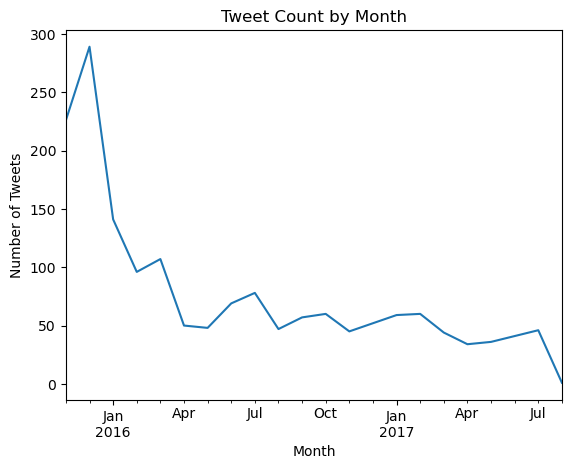

In [267]:
z.plot()
plt.title('Tweet Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tweets');

The number of ratings that WeRateDogs has posted each month has decreased since the account was first started.

# Question 2: What is the monthly trend of interactions with WeRateDogs's posts?

In [268]:
df1['tweet_activity'] = df1['retweet_count']+df1['favorite_count']

In [269]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,retweet_count,favorite_count,tweet_activity
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,6514,33819,40333
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,4328,25461,29789
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,8964,42908,51872
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,9774,41048,50822
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,3261,20562,23823


In [270]:
monthly_tweet_activity = df1.groupby(df1['timestamp'].dt.to_period('M'))['tweet_activity'].mean()

C:\Users\SumeetAbhu\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


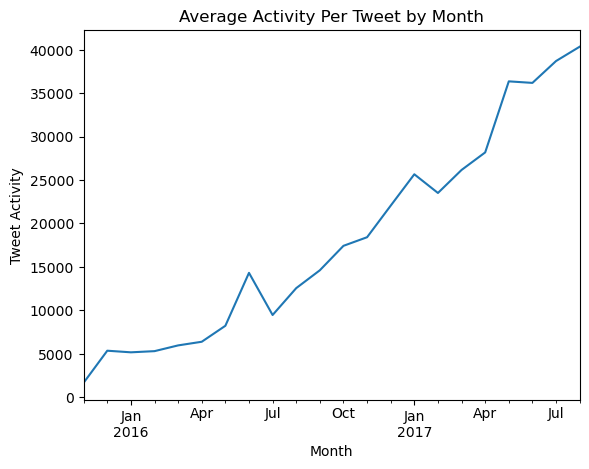

In [271]:
monthly_tweet_activity.plot()
plt.title('Average Activity Per Tweet by Month')
plt.xlabel('Month')
plt.ylabel('Tweet Activity');

There has been a steady upward trend in the average retweets and favorites since the account was first started, going from almost no interaction to around 35,000 retweets and favorites per post in the latest months. This trend is encouraging given that the account's original purpose was to post images with ratings.

# Question 3:Is there any correlation between WeRateDogs's ratings and the interactions by Twitter users?

In [272]:
dogs_clean['rating'] = dogs_clean['rating_numerator']/dogs_clean['rating_denominator']

In [273]:
new_df = df1.merge(dogs_clean, how='inner', on='tweet_id')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1686 non-null   int64              
 1   in_reply_to_status_id  20 non-null     float64            
 2   in_reply_to_user_id    20 non-null     float64            
 3   timestamp              1686 non-null   datetime64[ns, UTC]
 4   source                 1686 non-null   object             
 5   text                   1686 non-null   object             
 6   expanded_urls          1686 non-null   object             
 7   retweet_count          1686 non-null   int64              
 8   favorite_count         1686 non-null   int64              
 9   tweet_activity         1686 non-null   int64              
 10  rating_numerator       1686 non-null   float64            
 11  rating_denominator     1686 non-null   float64          

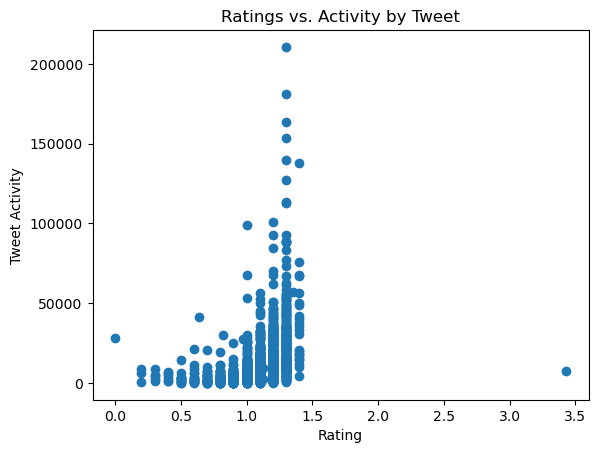

In [274]:
plt.scatter(data=new_df, x='rating', y='tweet_activity')
plt.title('Ratings vs. Activity by Tweet')
plt.xlabel('Rating')
plt.ylabel('Tweet Activity');

Again, there appears to be a positive correlation between ratings and activity by tweet

# Question 4: What is the most common dog stage?

In [275]:
# Dog stage and count
dogs_clean['stage'].value_counts(normalize=True)

pupper     0.670213
doggo      0.205674
puppo      0.095745
floofer    0.028369
Name: stage, dtype: float64

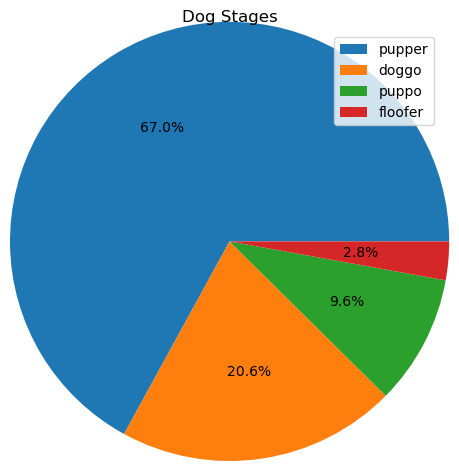

In [276]:
# Plot pie chart
labels = ['pupper', 'doggo', 'puppo', 'floofer']
values = dogs_clean['stage'].value_counts(normalize=True)


plt.pie(values, autopct='%1.1f%%', radius = 1.3)
plt.legend(labels, loc=0)
plt.title('Dog Stages')
plt.tight_layout()

For those have the stage information, pupper is most common stage among all those tweets.

# Merging the 3 dataframes

In [277]:
# Merge tables
new_df = df1.merge(dogs_clean, how='inner', on='tweet_id')
new_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,retweet_count,favorite_count,tweet_activity,rating_numerator,rating_denominator,name,stage,rating
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,6514,33819,40333,13.0,10.0,Tilly,NaN,1.3
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,4328,25461,29789,12.0,10.0,Archie,NaN,1.2
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,8964,42908,51872,13.0,10.0,Darla,NaN,1.3
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,9774,41048,50822,12.0,10.0,Franklin,NaN,1.2
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,3261,20562,23823,13.0,10.0,NaN,NaN,1.3


In [279]:
df2_old.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [280]:
consolidated= new_df.merge(df2_old, how='inner', on='tweet_id')

In [281]:
consolidated

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,retweet_count,favorite_count,tweet_activity,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,6514,33819,40333,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,4328,25461,29789,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,8964,42908,51872,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,9774,41048,50822,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,3261,20562,23823,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,41,111,152,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1682,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,147,311,458,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1683,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,47,128,175,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1684,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,48,132,180,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [282]:
consolidated.to_csv('twitter_archive_master-Updated.csv', index=False)